In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 

In [82]:
Global_Power_df=pd.read_csv("Global_Power.csv")

In [83]:
Global_Power_df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             886.004428           663.774500  Central Electricity Authority   
4            6243.000000          5385.579736  C

In [84]:
Global_Power_df.shape

(908, 25)

In [85]:
Global_Power_df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [86]:
Global_Power_df.tail()

country country_long                          name   gppd_idnr  \
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  geolocation_source  wepp_id year_of_capacity_data  \
903  ...                 WRI      NaN                2018.0   
904  ...      Industry About      NaN                   NaN   
905  ...                 WRI      NaN                   NaN   
906  ...                 WRI      NaN                   NaN   
907  ...                 WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
903            233.59665                865.4  Central Electricity Authority   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   
907                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  
907                       NaN  

[5 rows x 25 columns]

In [87]:
Global_Power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [88]:
Global_Power_df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [89]:
Global_Power_df.isnull().sum().sort_values(ascending=False)

estimated_generation_gwh    908
wepp_id                     908
other_fuel3                 908
other_fuel2                 907
other_fuel1                 709
owner                       566
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
longitude                    46
latitude                     46
geolocation_source           19
name                          0
primary_fuel                  0
url                           0
source                        0
country_long                  0
gppd_idnr                     0
capacity_mw                   0
country                       0
dtype: int64

Dropping the columns which are fully null

In [90]:
Global_Power_df.drop(columns=['country_long','name','estimated_generation_gwh','other_fuel3', 'wepp_id', 'other_fuel2'], inplace=True)

In [91]:
Global_Power_df['country'].unique()

array(['IND'], dtype=object)

In [92]:
Global_Power_df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [93]:
Global_Power_df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [94]:
Global_Power_df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [95]:
Global_Power_df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [96]:
Global_Power_df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [97]:
Global_Power_df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [98]:
Global_Power_df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [99]:
Global_Power_df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [100]:
Global_Power_df.drop(columns=['country','gppd_idnr', 'owner', 'source', 'url', 'year_of_capacity_data', 'generation_data_source', 'geolocation_source'], inplace=True)

Converting the categroical columns into numerical columns

In [101]:
clean_data = {'geolocation_source': {'National Renewable Energy Laboratory' : 0 , 'WRI' : 1,'Industry About':2} ,
              'generation_data_source': {'Central Electricity Authority': 1},
              'other_fuel1':{'Oil':1,'Cogeneration':2,'Gas':3},
              'primary_fuel':{'Solar':0,'Coal':1, 'Wind':2, 'Gas':3, 'Hydro':4, 'Biomass':5, 'Oil':6,'Nuclear':7}
               }
Global_Power_df = Global_Power_df.copy()
Global_Power_df.replace(clean_data, inplace=True)

In [102]:
Global_Power_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int64
other_fuel1            float64
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [103]:
Global_Power_df.isnull().sum().sort_values(ascending=False)

other_fuel1            709
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
commissioning_year     380
latitude                46
longitude               46
capacity_mw              0
primary_fuel             0
dtype: int64

Filling the null values in the following columns

In [104]:
Global_Power_df['generation_gwh_2013'] = Global_Power_df['generation_gwh_2013'].fillna(0)
Global_Power_df['generation_gwh_2014'] = Global_Power_df['generation_gwh_2014'].fillna(0)
Global_Power_df['generation_gwh_2015'] = Global_Power_df['generation_gwh_2015'].fillna(0)
Global_Power_df['generation_gwh_2016'] = Global_Power_df['generation_gwh_2016'].fillna(0)
Global_Power_df['generation_gwh_2017'] = Global_Power_df['generation_gwh_2017'].fillna(0)
Global_Power_df['other_fuel1']         = Global_Power_df['other_fuel1'].fillna(0)

In [105]:
Global_Power_df['commissioning_year'].fillna(Global_Power_df['commissioning_year'].median(), inplace=True)

In [106]:
Global_Power_df.dropna(subset=['latitude', 'longitude'], inplace=True)

In [107]:
Global_Power_df.isnull().sum().sort_values(ascending=False)

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<Axes: >

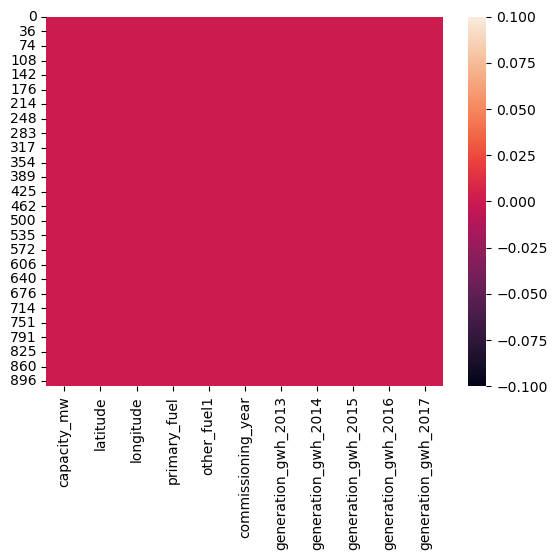

In [108]:
sns.heatmap(Global_Power_df.isnull())              #using heatmap for better visualization of null value.

DATA VISUALIZATION Various graphs are used to inorder to understand how the data is distributed,it's skweness, scattered.

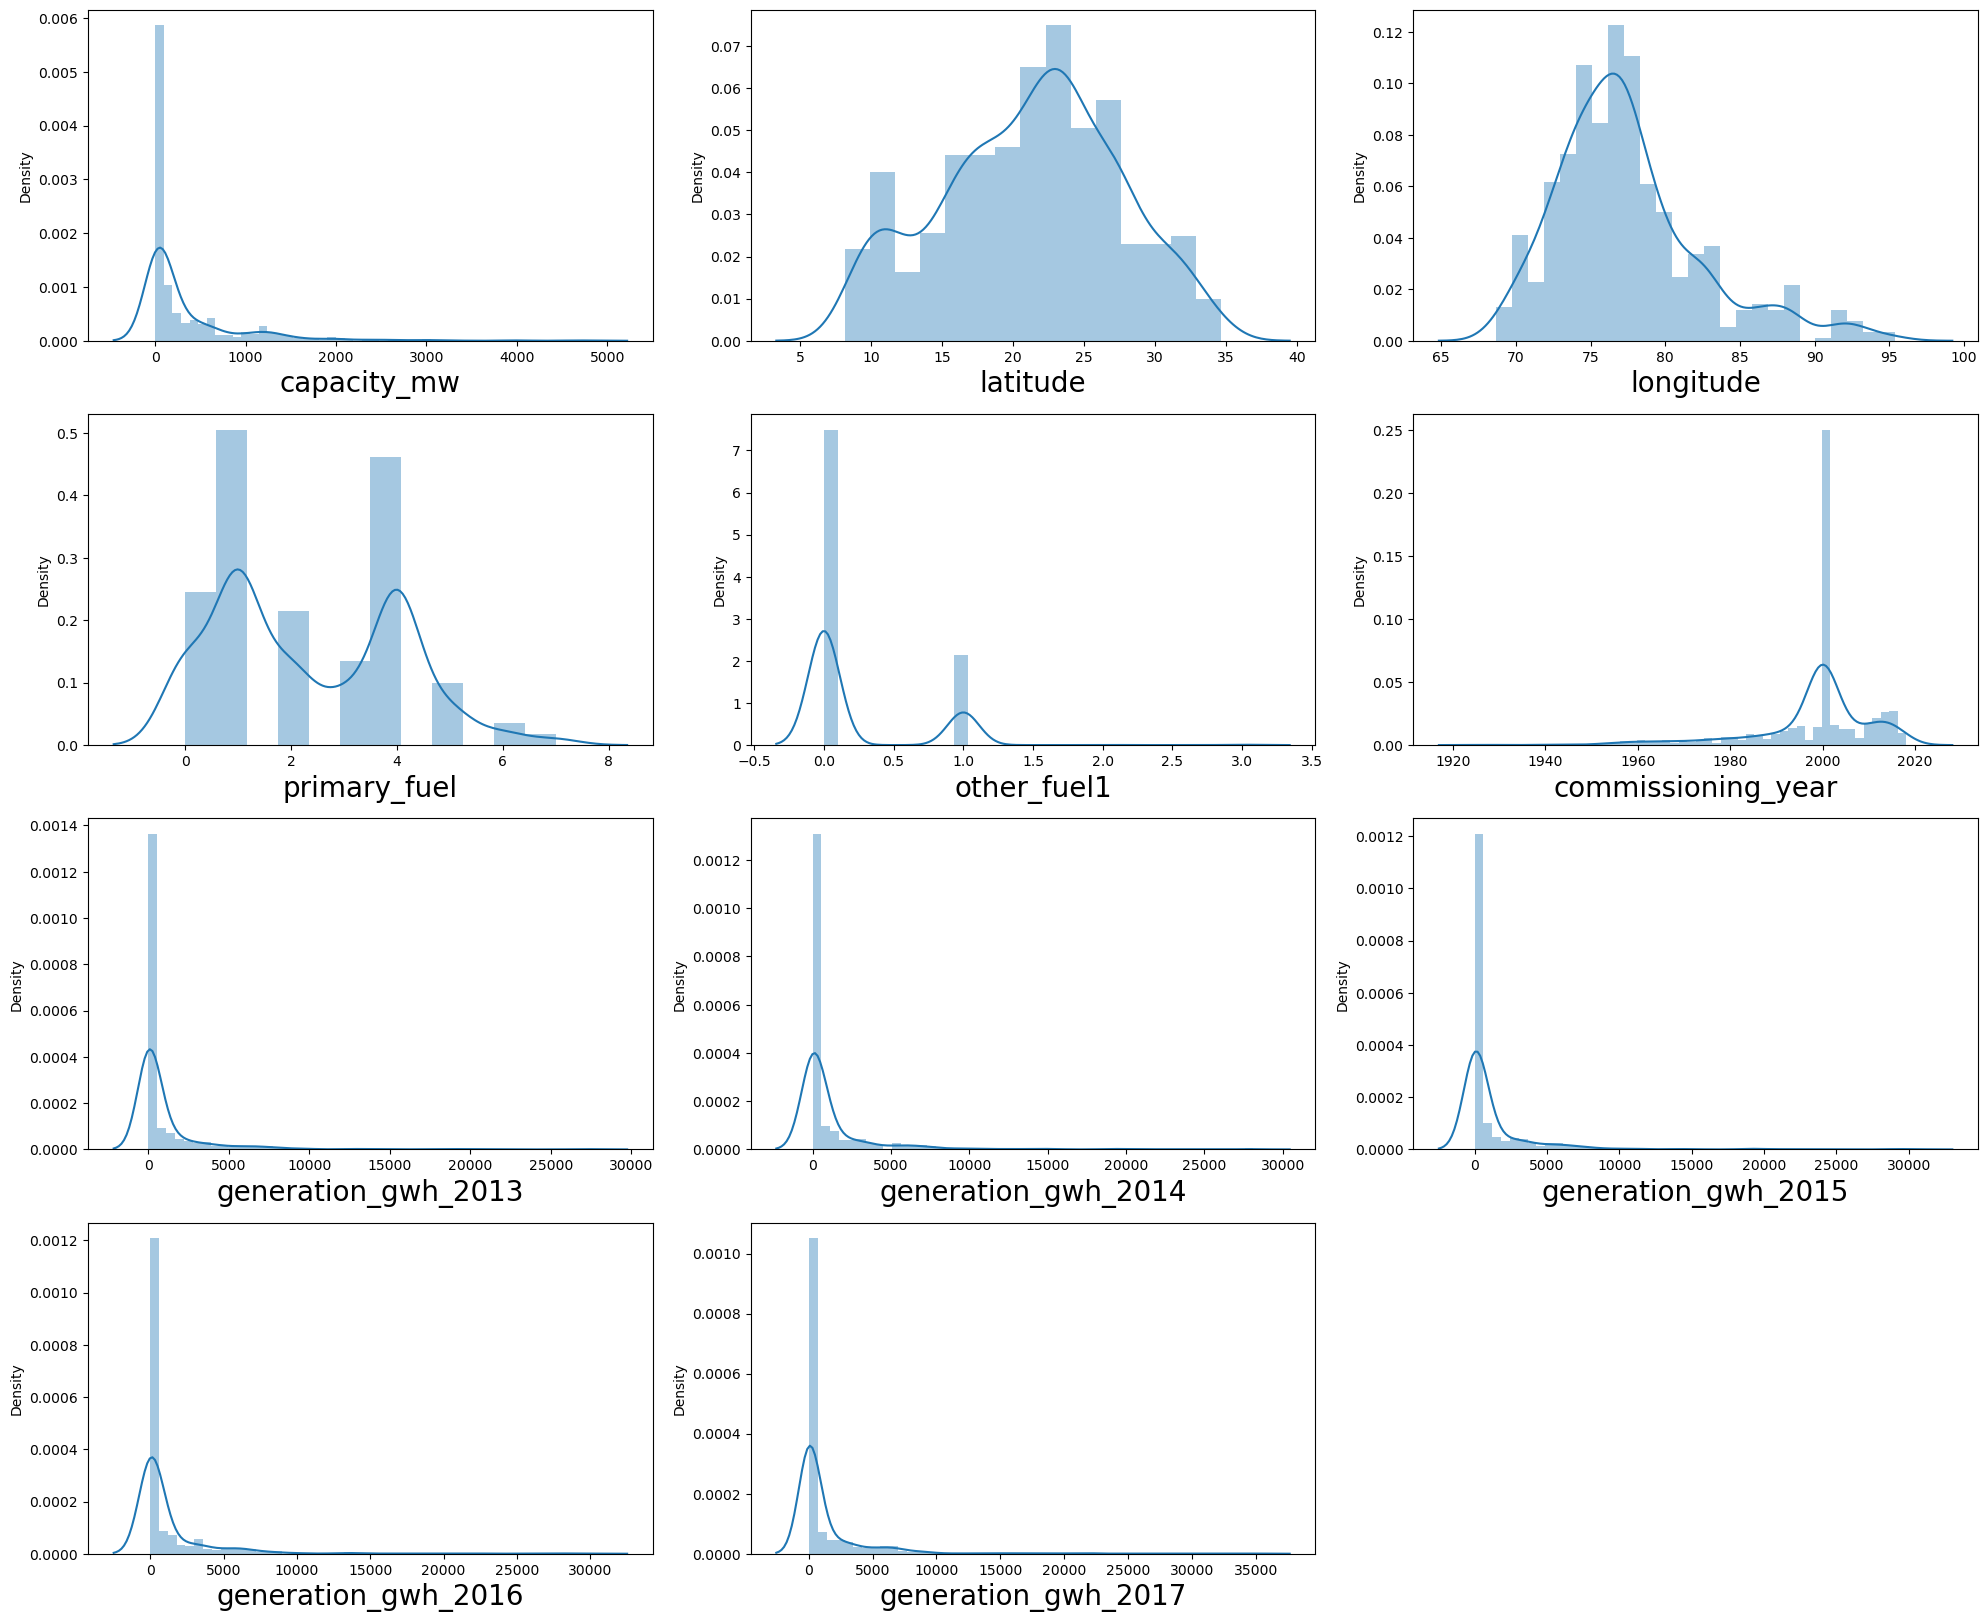

In [110]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in Global_Power_df:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(Global_Power_df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

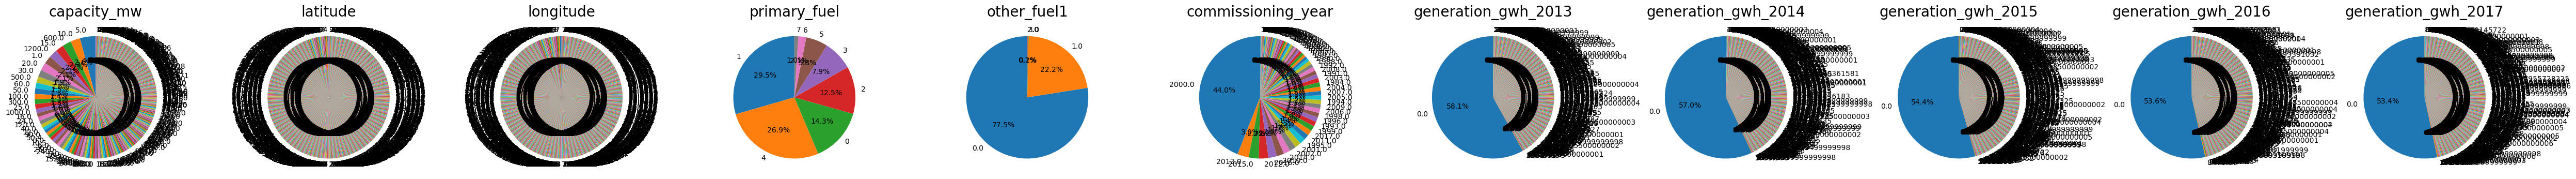

In [111]:
plt.figure(figsize=(50,25))
plotnumber = 1
for column in Global_Power_df:
    if plotnumber<=11:
        ax = plt.subplot(1,11,plotnumber)
        data = Global_Power_df[column].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
        plt.title(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()
 
 

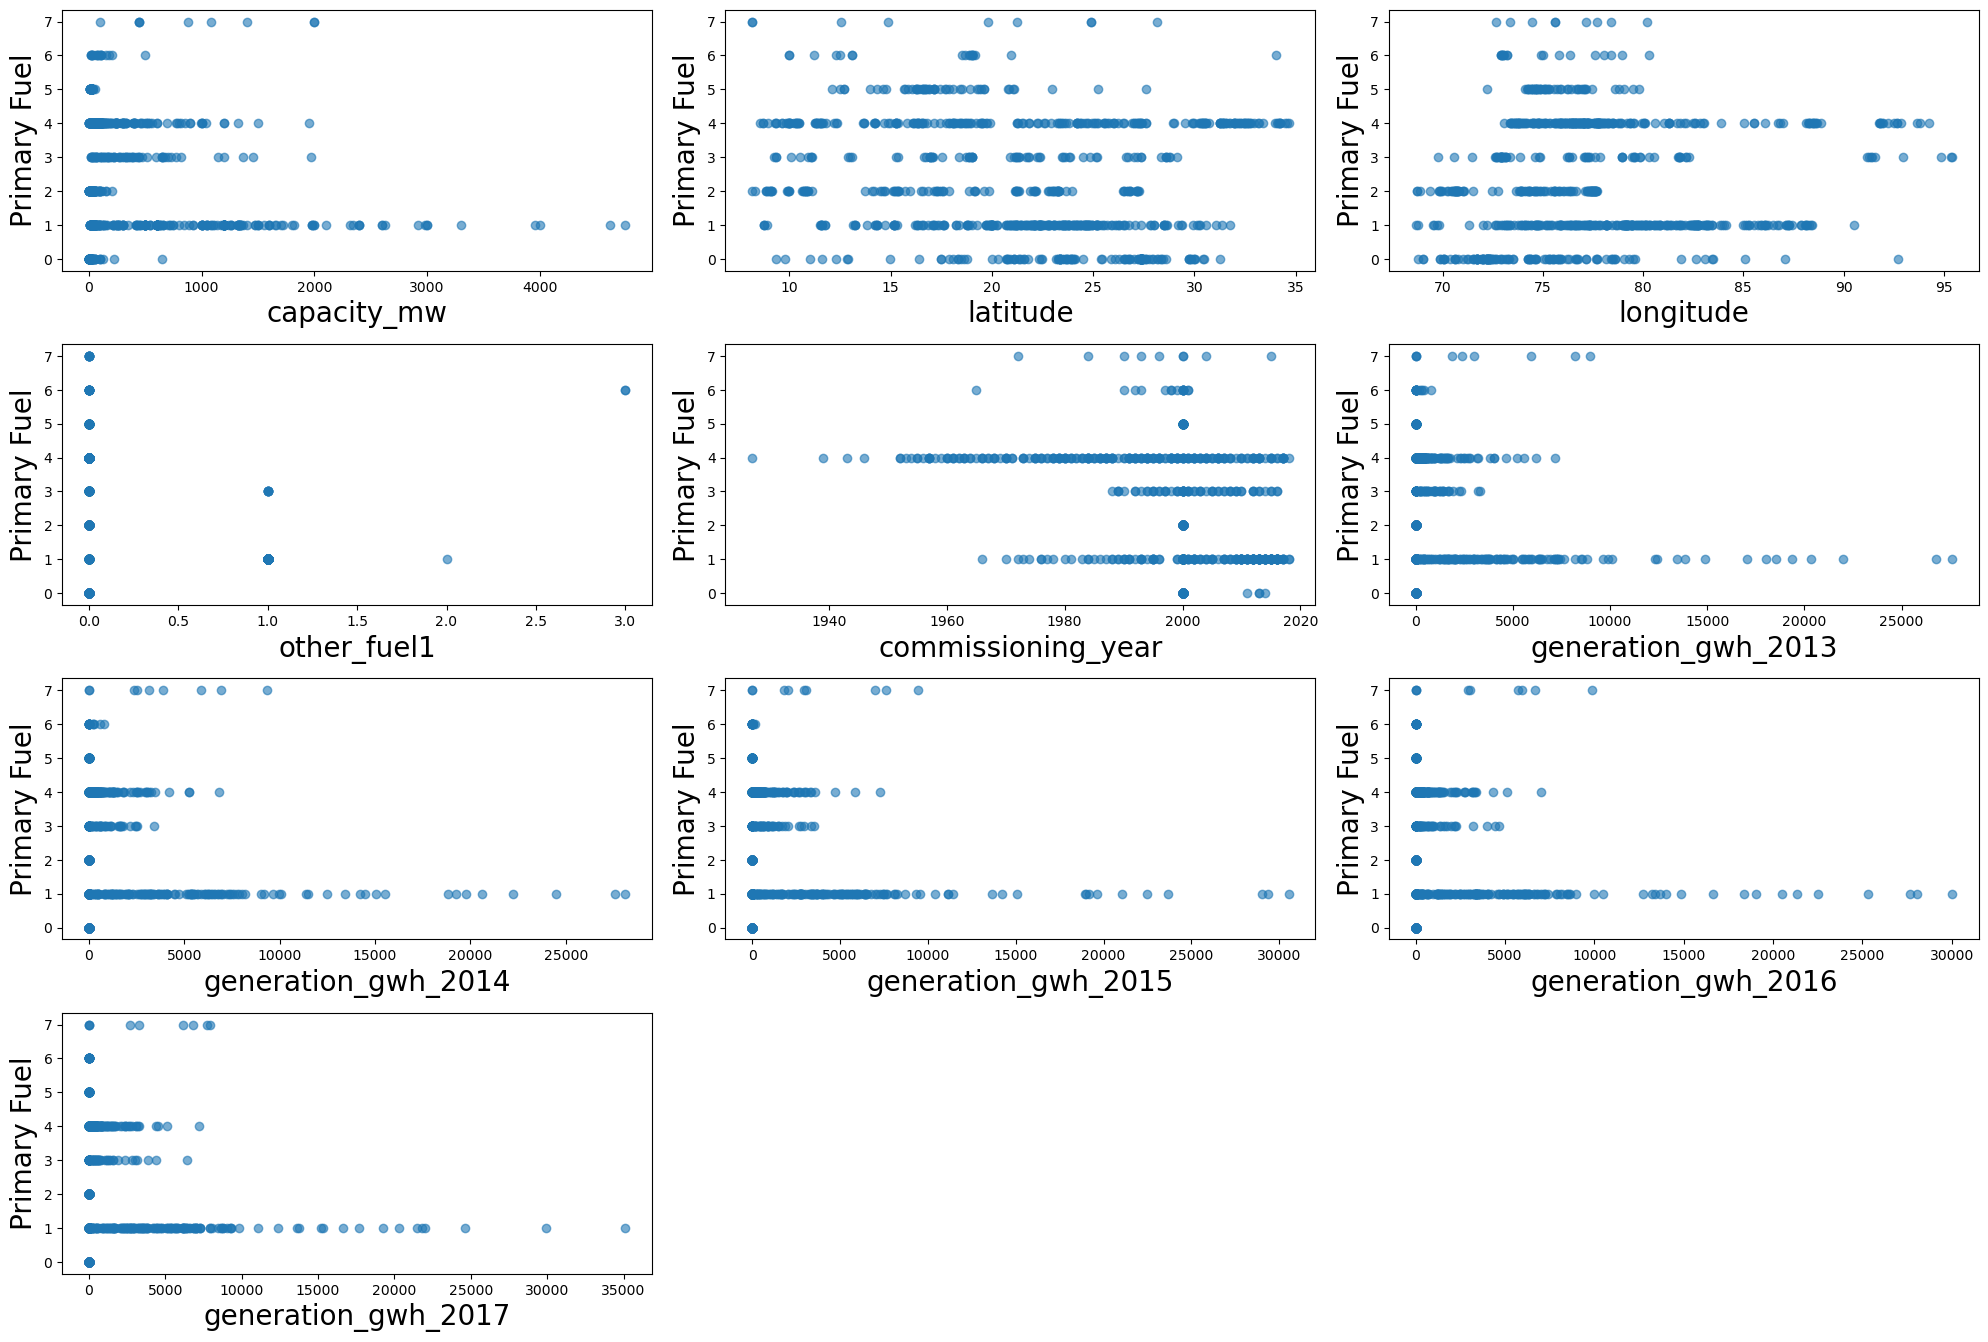

In [112]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Global_Power_df:
    if column != 'primary_fuel': 
            ax=plt.subplot(10,3,plotnumber)
            plt.scatter(Global_Power_df[column], Global_Power_df['primary_fuel'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Primary Fuel', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()



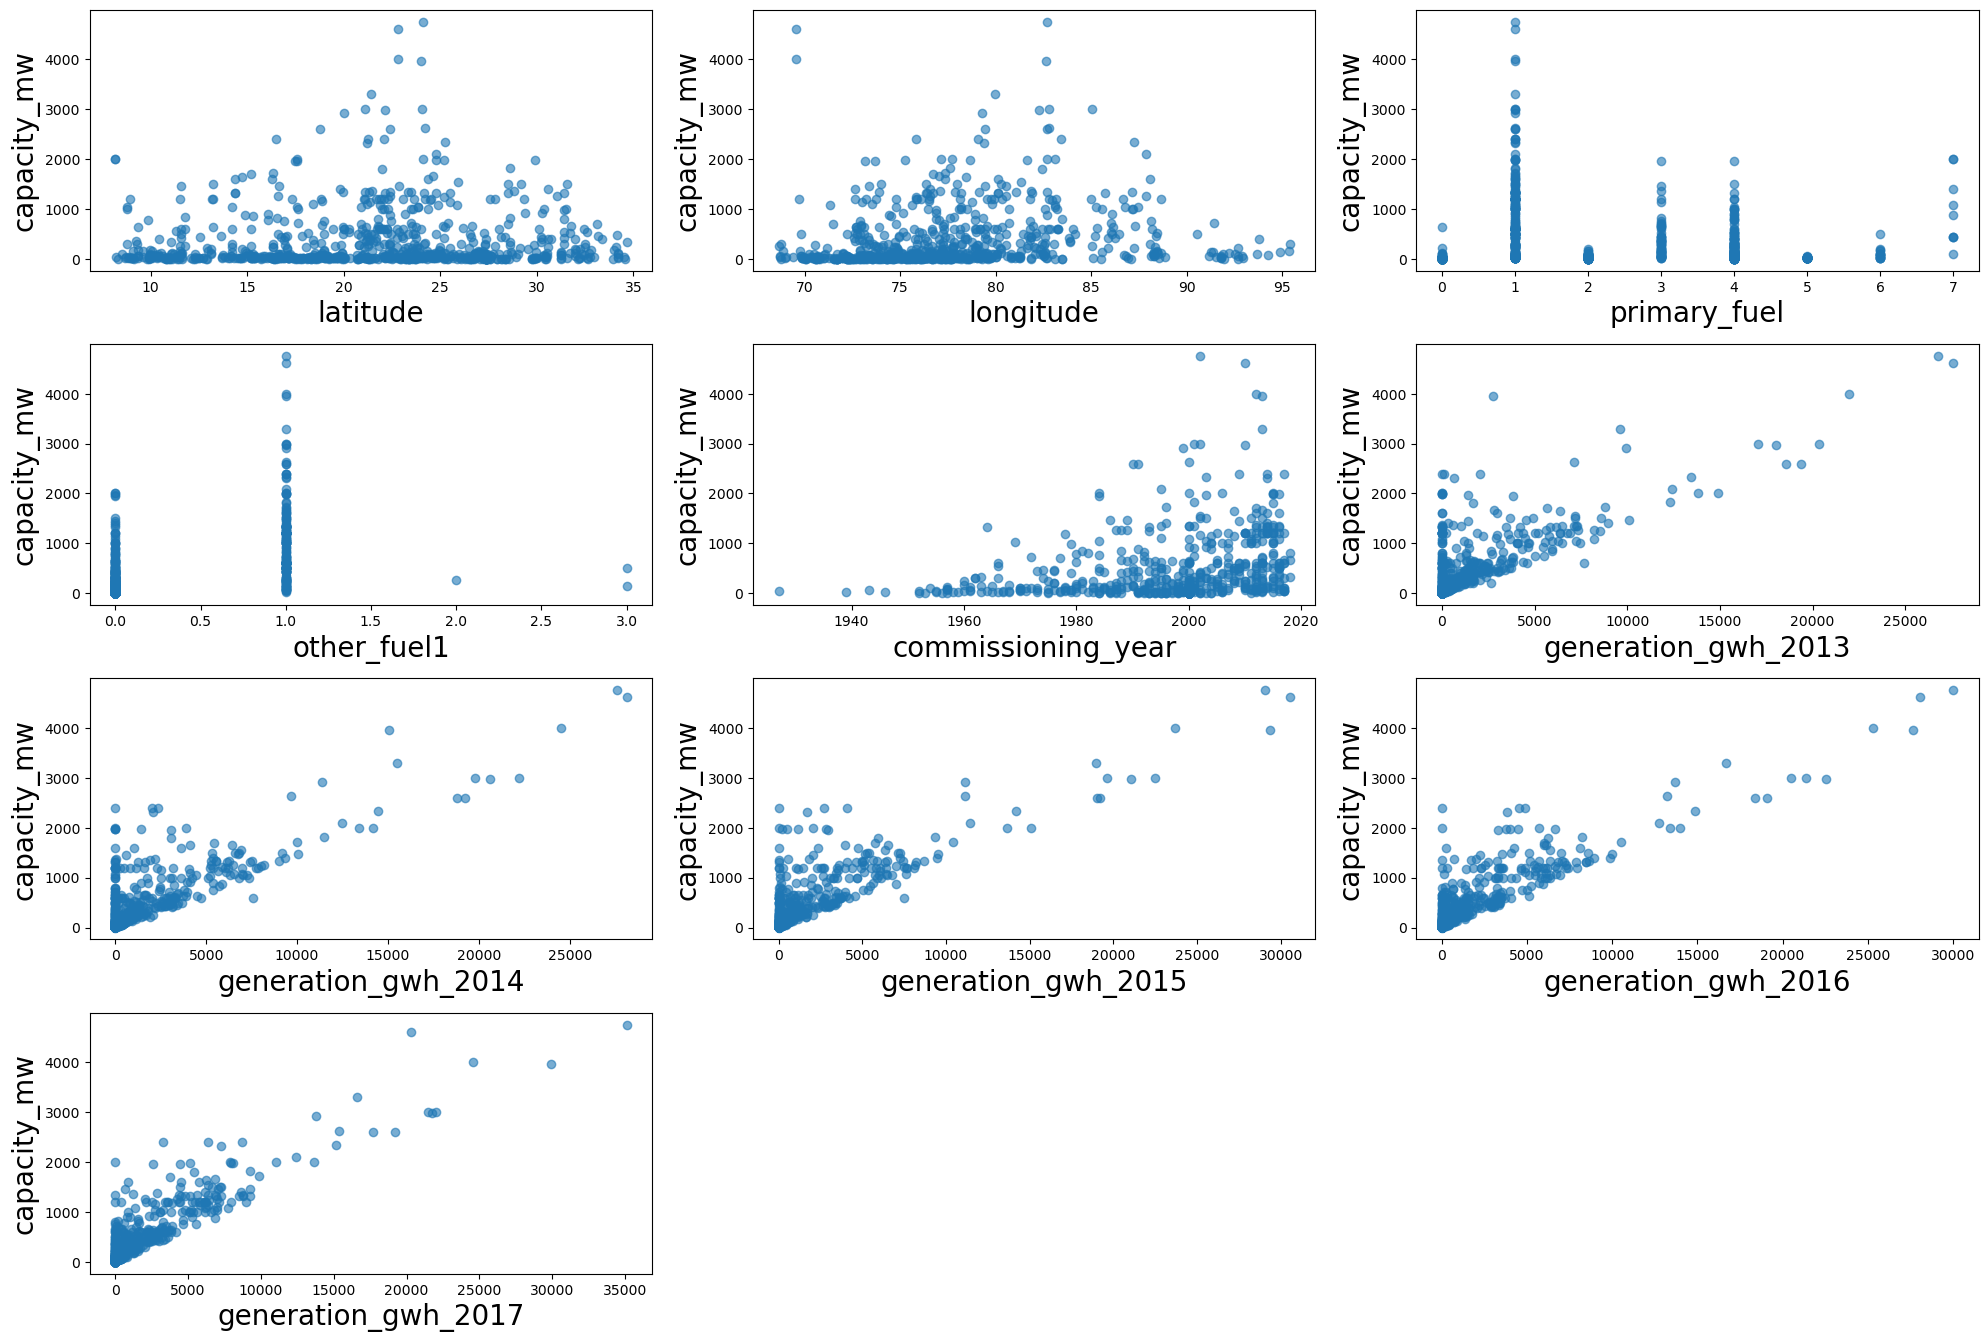

In [113]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Global_Power_df:
    if column != 'capacity_mw': 
            ax=plt.subplot(10,3,plotnumber)
            plt.scatter(Global_Power_df[column], Global_Power_df['capacity_mw'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('capacity_mw', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()


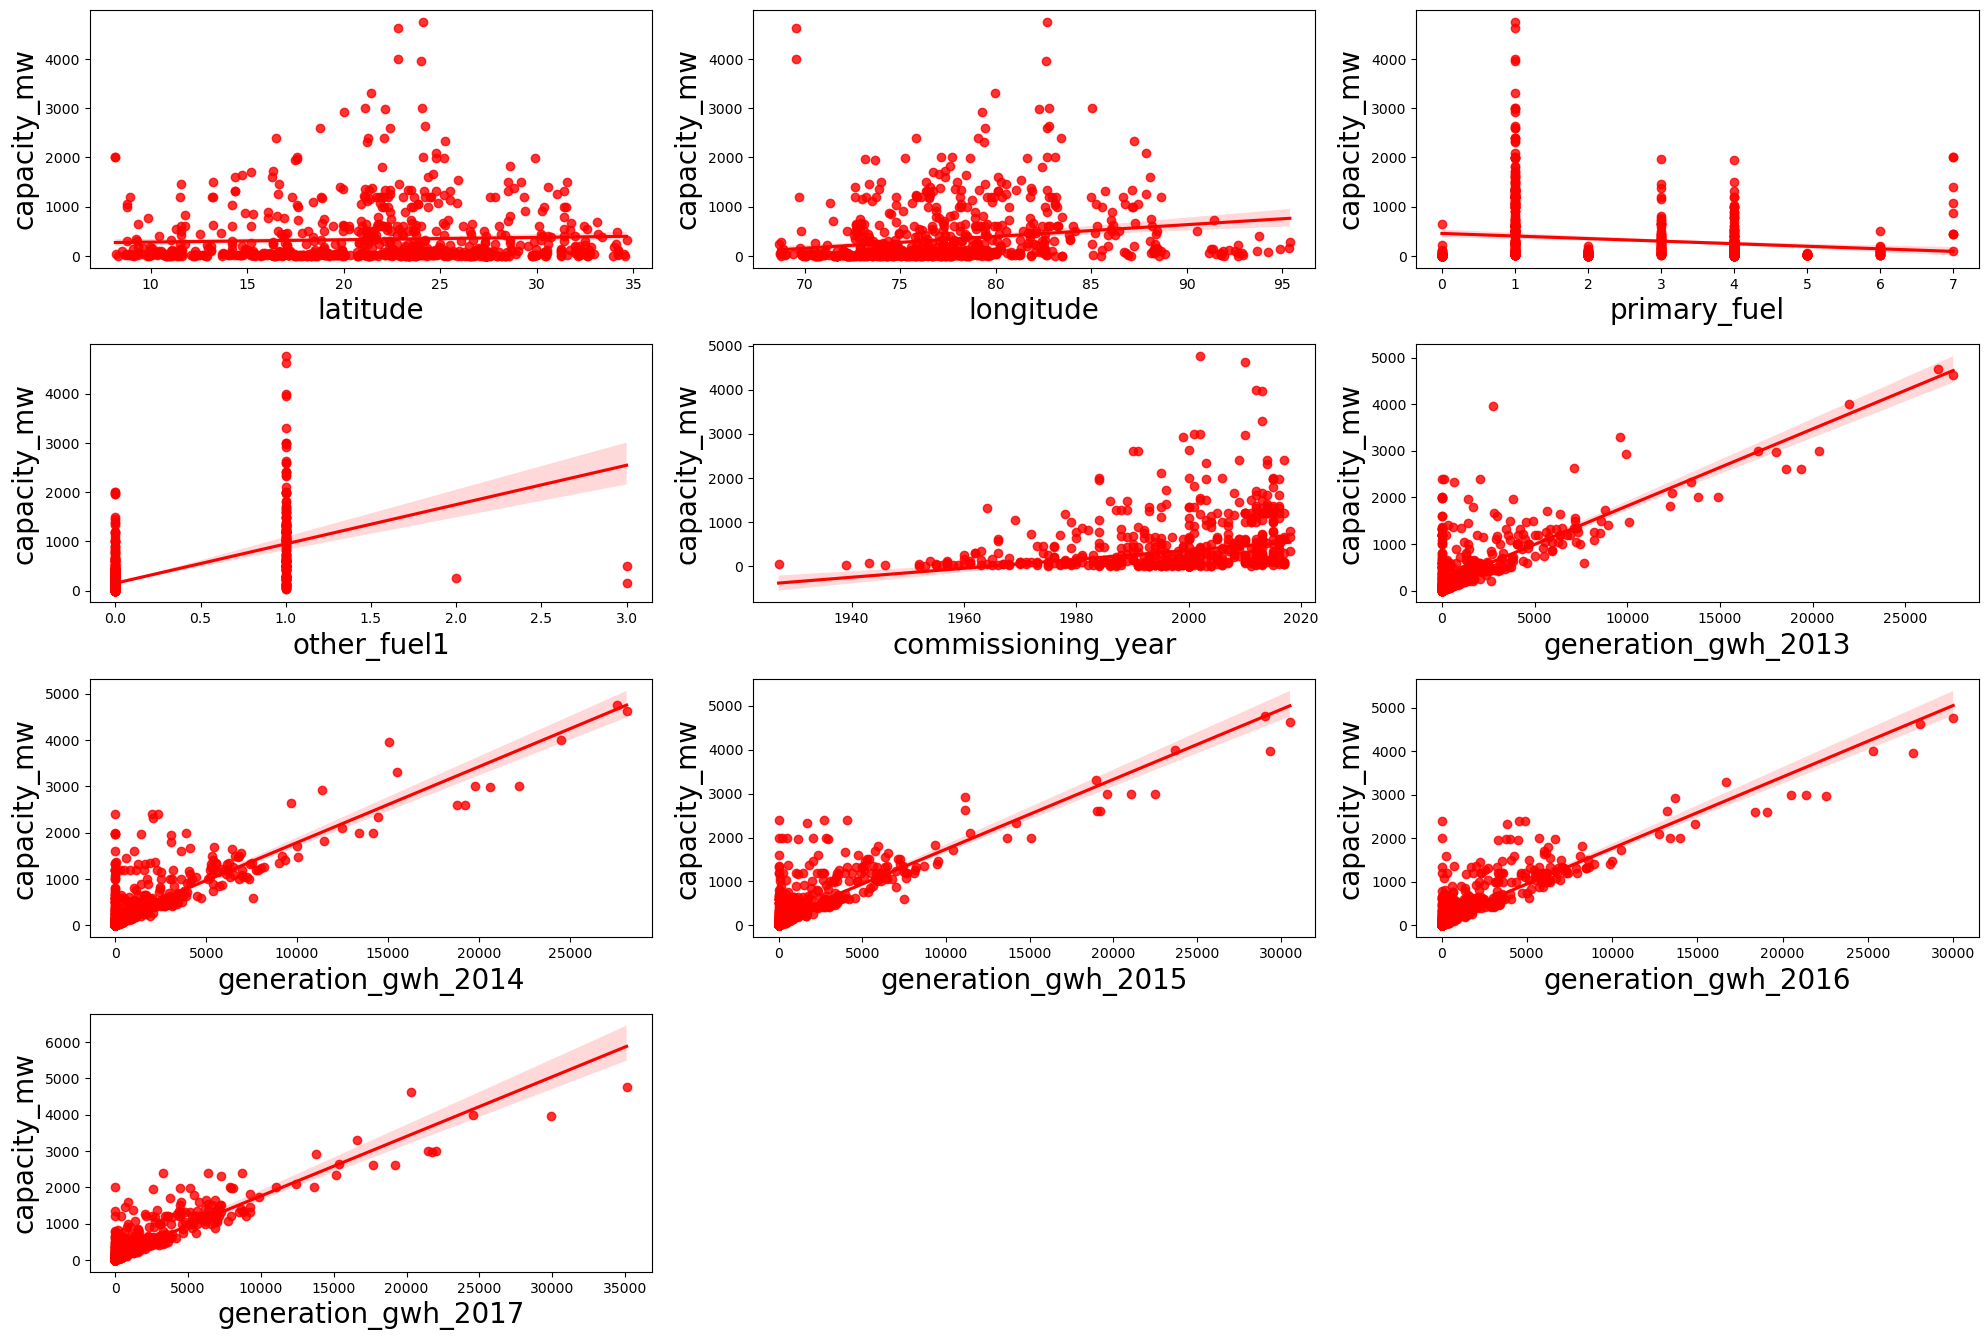

In [114]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Global_Power_df:
    if column != 'capacity_mw': 
            ax=plt.subplot(10,3,plotnumber)
            sns.regplot(x=Global_Power_df[column],y=Global_Power_df['capacity_mw'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('capacity_mw', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

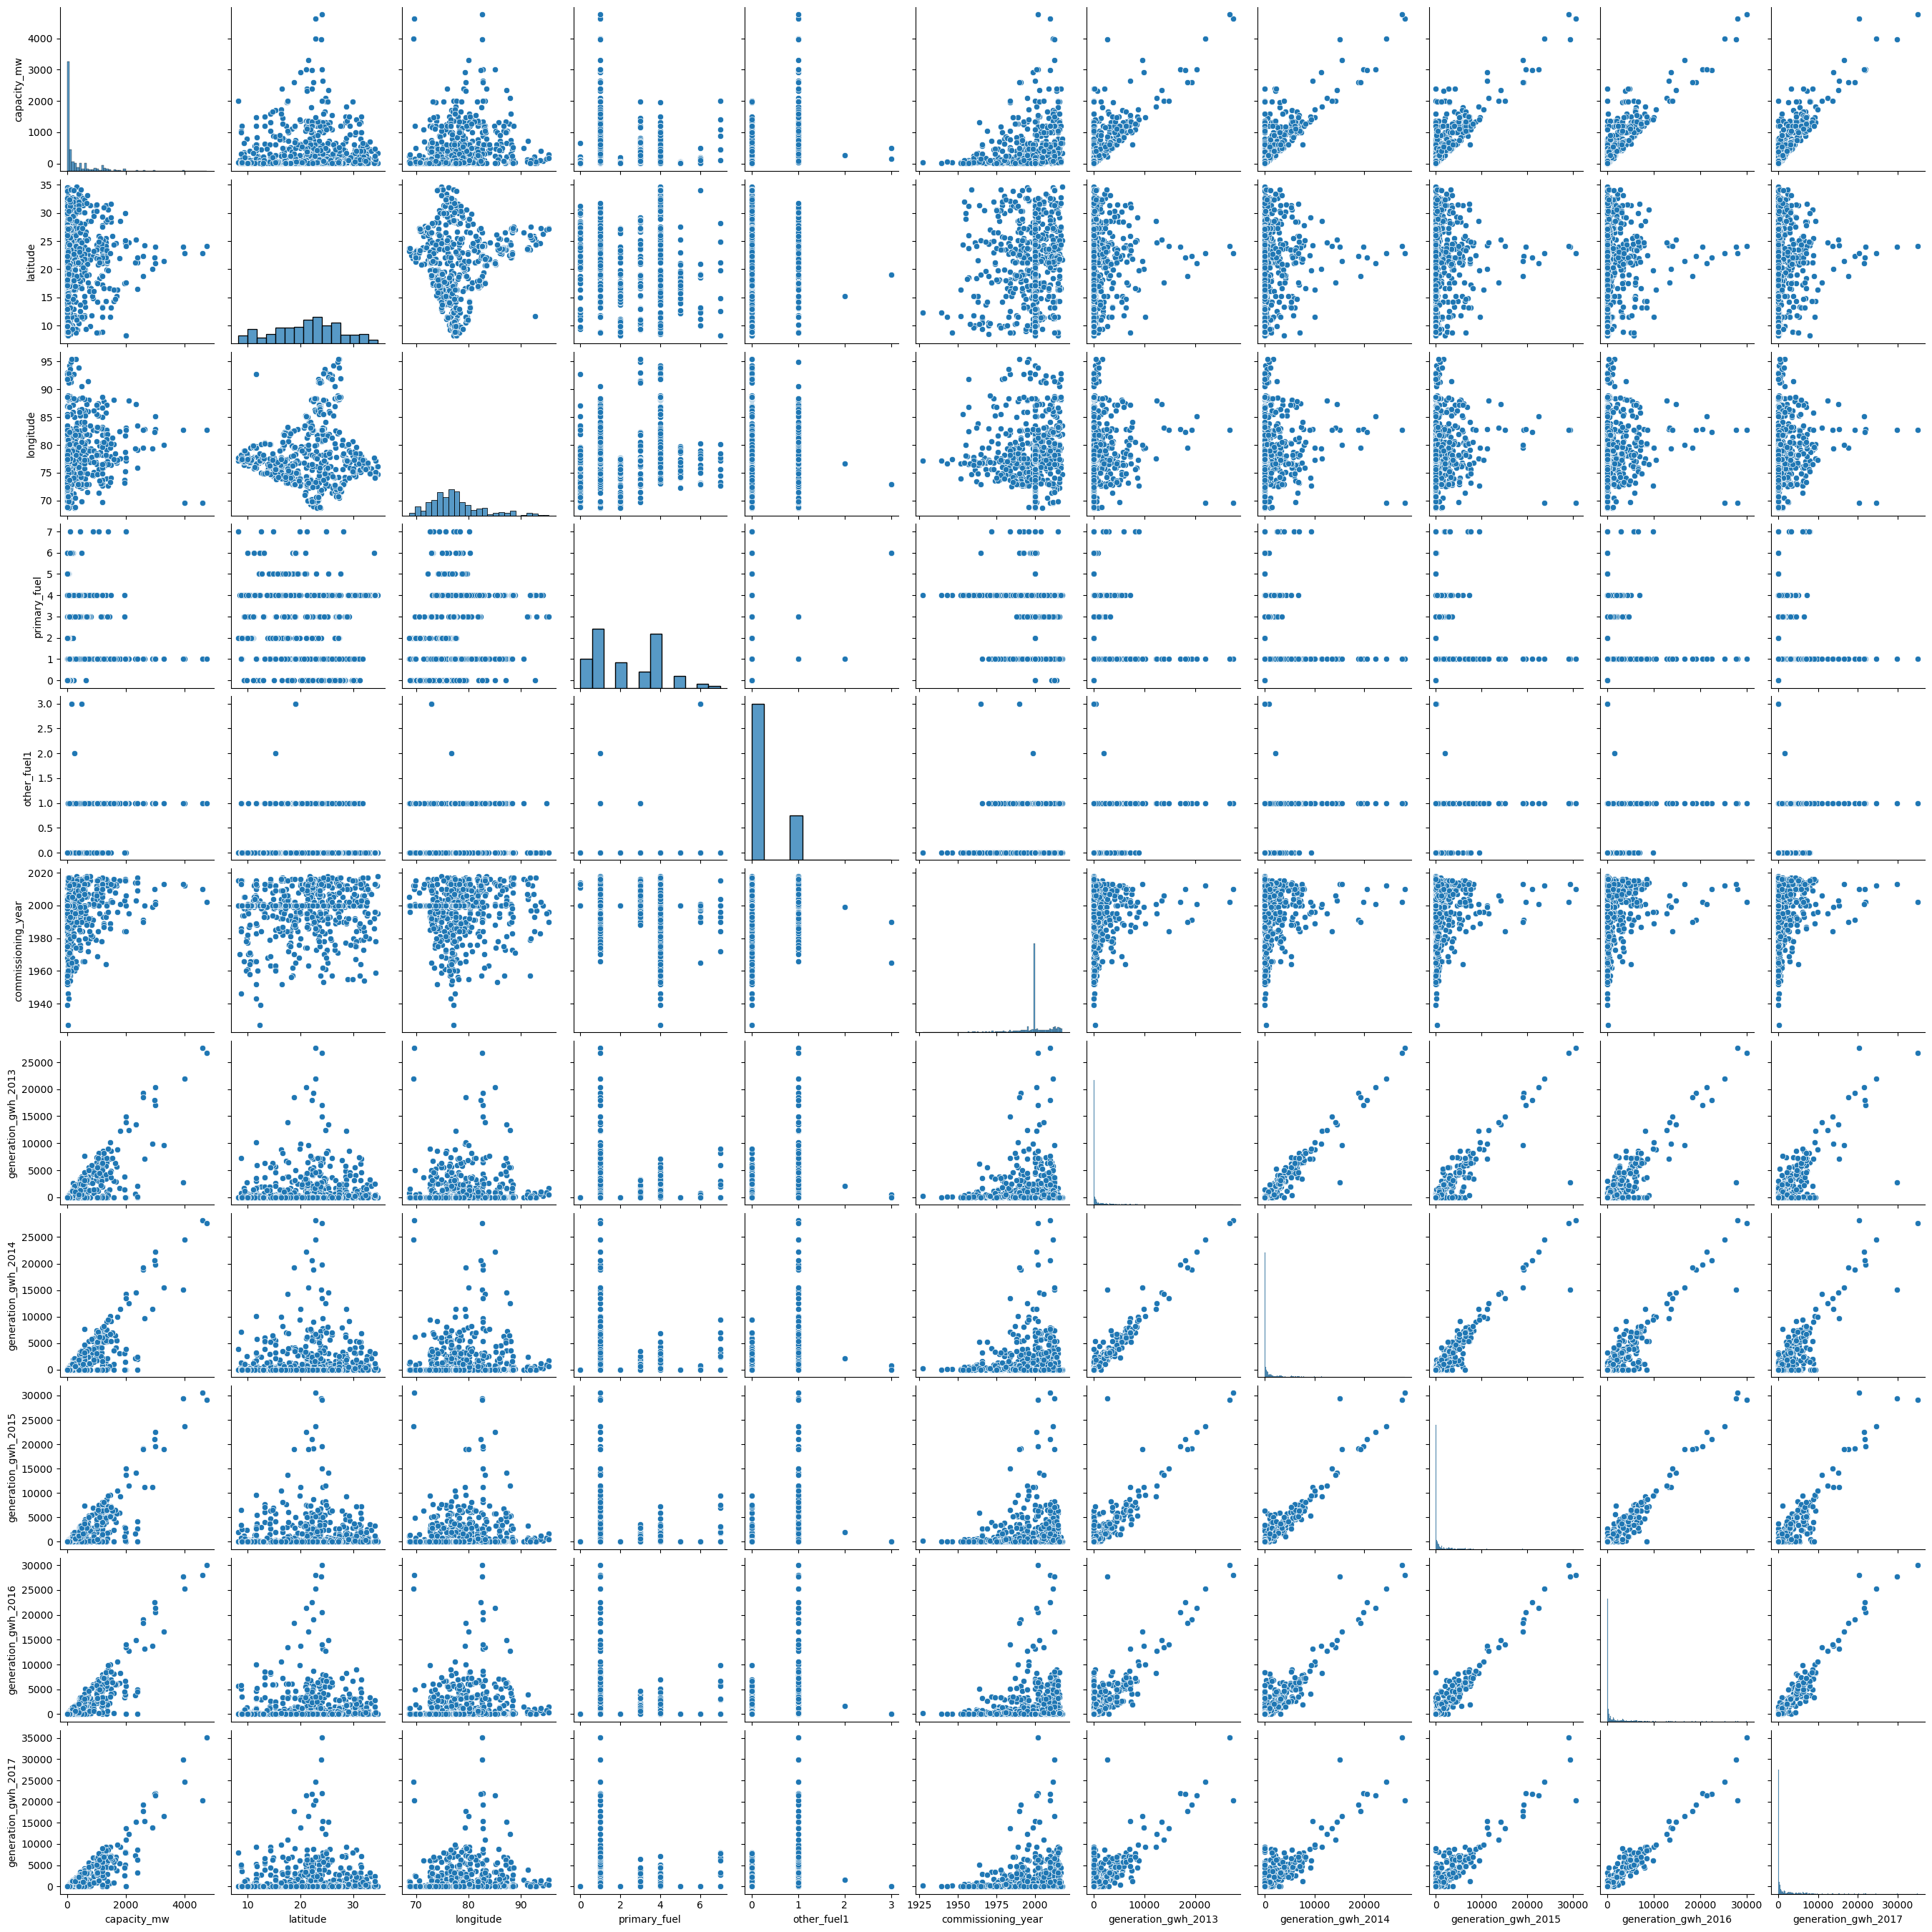

In [115]:
sns.pairplot(Global_Power_df)

capacity_mw                Axes(0.125,0.77;0.227941x0.11)
latitude                Axes(0.398529,0.77;0.227941x0.11)
longitude               Axes(0.672059,0.77;0.227941x0.11)
primary_fuel              Axes(0.125,0.638;0.227941x0.11)
other_fuel1            Axes(0.398529,0.638;0.227941x0.11)
commissioning_year     Axes(0.672059,0.638;0.227941x0.11)
generation_gwh_2013       Axes(0.125,0.506;0.227941x0.11)
generation_gwh_2014    Axes(0.398529,0.506;0.227941x0.11)
generation_gwh_2015    Axes(0.672059,0.506;0.227941x0.11)
generation_gwh_2016       Axes(0.125,0.374;0.227941x0.11)
generation_gwh_2017    Axes(0.398529,0.374;0.227941x0.11)
dtype: object

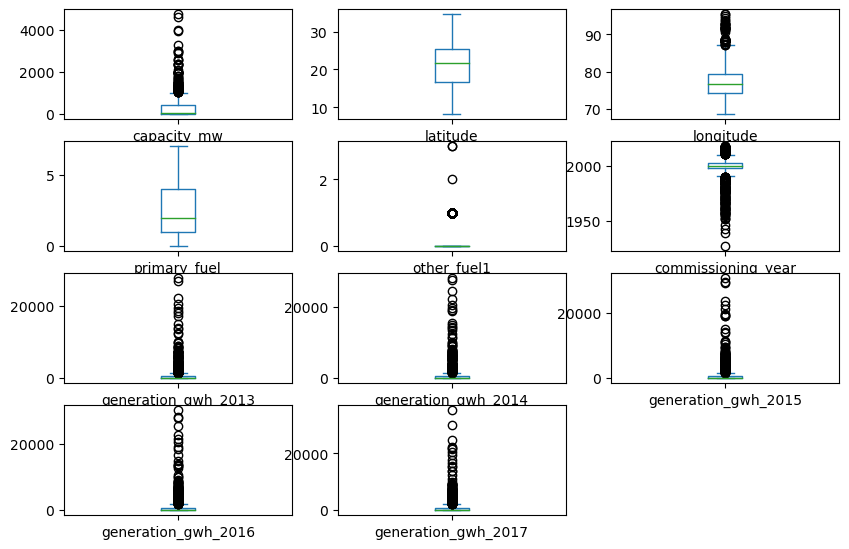

In [116]:
Global_Power_df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

In [117]:
from scipy.stats import zscore
out_liers=Global_Power_df[['longitude','other_fuel1','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
z=np.abs(zscore(out_liers))
z

longitude  other_fuel1  commissioning_year  generation_gwh_2013  \
0     0.857829     0.524402            0.995865             0.369316   
1     0.578835     0.524402            0.143627             0.369316   
2     1.646405     0.524402            0.143627             0.369316   
3     2.836701     0.524402            0.453532             0.141803   
4     1.011590     1.747128            1.305770             0.231462   
..         ...          ...                 ...                  ...   
903   0.018564     1.747128            1.383246             0.369316   
904   0.146307     0.524402            0.143627             0.369316   
905   0.380626     0.524402            0.143627             0.369316   
906   0.754453     0.524402            0.143627             0.369316   
907   0.005903     0.524402            0.143627             0.369316   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.376401             0.374438             0.386941   
1               0.376401             0.374438             0.386941   
2               0.376401             0.374438             0.386941   
3               0.169714             0.108509             0.109903   
4               0.639171             1.490258             1.565138   
..                   ...                  ...                  ...   
903             0.376401             0.374124             0.313899   
904             0.376401             0.374438             0.386941   
905             0.376401             0.374438             0.386941   
906             0.376401             0.374438             0.386941   
907             0.376401             0.374438             0.386941   

     generation_gwh_2017  
0               0.397608  
1               0.397608  
2               0.397608  
3               0.193710  
4               1.256733  
..                   ...  
903             0.131775  
904             0.397608  
905             0.397608  
906             0.397608  
907             0.397608  

[862 rows x 8 columns]

In [118]:
np.where(z>3)

(array([ 14,  14,  14, 138, 138, 138, 138, 138, 153, 153, 173, 177, 200,
        200, 200, 200, 200, 209, 212, 235, 298, 298, 298, 298, 298, 313,
        320, 327, 329, 347, 351, 351, 351, 351, 351, 358, 402, 411, 425,
        435, 461, 470, 470, 470, 470, 470, 471, 471, 471, 471, 471, 476,
        495, 508, 515, 547, 556, 565, 574, 594, 611, 621, 621, 621, 621,
        621, 629, 629, 629, 629, 629, 665, 665, 665, 665, 675, 678, 688,
        688, 688, 688, 688, 691, 691, 691, 691, 691, 693, 693, 693, 693,
        693, 695, 744, 744, 744, 744, 744, 765, 766, 766, 766, 766, 766,
        769, 771, 775, 776, 805, 837, 837, 837, 837, 837]),
 array([5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 0, 0, 3, 4, 5, 6, 7, 2, 2, 0, 3, 4,
        5, 6, 7, 0, 0, 0, 2, 0, 3, 4, 5, 6, 7, 2, 0, 0, 2, 2, 2, 3, 4, 5,
        6, 7, 3, 4, 5, 6, 7, 0, 0, 3, 2, 2, 2, 2, 2, 2, 0, 3, 4, 5, 6, 7,
        3, 4, 5, 6, 7, 4, 5, 6, 7, 2, 2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3,
        4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 1, 1

In [119]:
data=Global_Power_df[(z<3).all(axis=1)]
data.shape

(810, 11)

In [120]:
print("dataloss",((Global_Power_df.shape[0]-data.shape[0])/Global_Power_df.shape[0])*100)

dataloss 6.0324825986078885


The data loss is less than 10 that's why are dropping the data ang going ahead with new data set.

In [121]:
data.skew().sort_values(ascending=False)

generation_gwh_2013    2.812016
generation_gwh_2014    2.702013
generation_gwh_2015    2.534778
generation_gwh_2016    2.462305
generation_gwh_2017    2.350261
capacity_mw            2.056377
other_fuel1            1.409343
longitude              0.934097
primary_fuel           0.383223
latitude              -0.121223
commissioning_year    -1.185413
dtype: float64

Checking the skewness of the data and then removing it by using cuberoot and squareroot method.Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed).

In [122]:
data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw ']]=np.sqrt(data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']])

In [123]:
data.skew().sort_values(ascending=False)

capacity_mw            2.056377
generation_gwh_2013    1.649828
generation_gwh_2014    1.580130
generation_gwh_2015    1.515395
generation_gwh_2016    1.476601
generation_gwh_2017    1.438607
other_fuel1            1.409343
capacity_mw            1.147272
longitude              0.934097
primary_fuel           0.383223
latitude              -0.121223
commissioning_year    -1.185413
dtype: float64

In [124]:
data['capacity_mw']=np.cbrt(data['capacity_mw'])

In [125]:
data.skew().sort_values(ascending=False)

generation_gwh_2013    1.649828
generation_gwh_2014    1.580130
generation_gwh_2015    1.515395
generation_gwh_2016    1.476601
generation_gwh_2017    1.438607
other_fuel1            1.409343
capacity_mw            1.147272
longitude              0.934097
capacity_mw            0.805384
primary_fuel           0.383223
latitude              -0.121223
commissioning_year    -1.185413
dtype: float64

In [126]:
data.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.066095   0.324713     -0.006011   
latitude                0.066095  1.000000  -0.008919     -0.169914   
longitude               0.324713 -0.008919   1.000000      0.047217   
primary_fuel           -0.006011 -0.169914   0.047217      1.000000   
other_fuel1             0.669471  0.050793   0.351750     -0.371235   
commissioning_year      0.206988  0.092734   0.085562     -0.293378   
generation_gwh_2013     0.698122  0.088963   0.230523      0.023158   
generation_gwh_2014     0.749567  0.101503   0.247132     -0.001497   
generation_gwh_2015     0.805776  0.103867   0.276969     -0.035915   
generation_gwh_2016     0.846203  0.103875   0.319852     -0.061242   
generation_gwh_2017     0.862669  0.121193   0.334556     -0.072530   
capacity_mw             0.992450  0.064142   0.307586     -0.043859   

                     other_fuel1  commissioning_year  generation_gwh_2013  \
capacity_mw             0.669471            0.206988             0.698122   
latitude                0.050793            0.092734             0.088963   
longitude               0.351750            0.085562             0.230523   
primary_fuel           -0.371235           -0.293378             0.023158   
other_fuel1             1.000000            0.301019             0.523822   
commissioning_year      0.301019            1.000000            -0.109249   
generation_gwh_2013     0.523822           -0.109249             1.000000   
generation_gwh_2014     0.580674           -0.037658             0.961749   
generation_gwh_2015     0.631885            0.060965             0.882427   
generation_gwh_2016     0.672740            0.137677             0.812160   
generation_gwh_2017     0.693789            0.166172             0.762505   
capacity_mw             0.676559            0.227087             0.691602   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.749567             0.805776   
latitude                        0.101503             0.103867   
longitude                       0.247132             0.276969   
primary_fuel                   -0.001497            -0.035915   
other_fuel1                     0.580674             0.631885   
commissioning_year             -0.037658             0.060965   
generation_gwh_2013             0.961749             0.882427   
generation_gwh_2014             1.000000             0.941366   
generation_gwh_2015             0.941366             1.000000   
generation_gwh_2016             0.878340             0.945889   
generation_gwh_2017             0.835620             0.900997   
capacity_mw                     0.749355             0.811580   

                     generation_gwh_2016  generation_gwh_2017  capacity_mw   
capacity_mw                     0.846203             0.862669      0.992450  
latitude                        0.103875             0.121193      0.064142  
longitude                       0.319852             0.334556      0.307586  
primary_fuel                   -0.061242            -0.072530     -0.043859  
other_fuel1                     0.672740             0.693789      0.676559  
commissioning_year              0.137677             0.166172      0.227087  
generation_gwh_2013             0.812160             0.762505      0.691602  
generation_gwh_2014             0.878340             0.835620      0.749355  
generation_gwh_2015             0.945889             0.900997      0.811580  
generation_gwh_2016             1.000000             0.968398      0.858466  
generation_gwh_2017             0.968398             1.000000      0.877887  
capacity_mw                     0.858466             0.877887      1.000000

<Axes: >

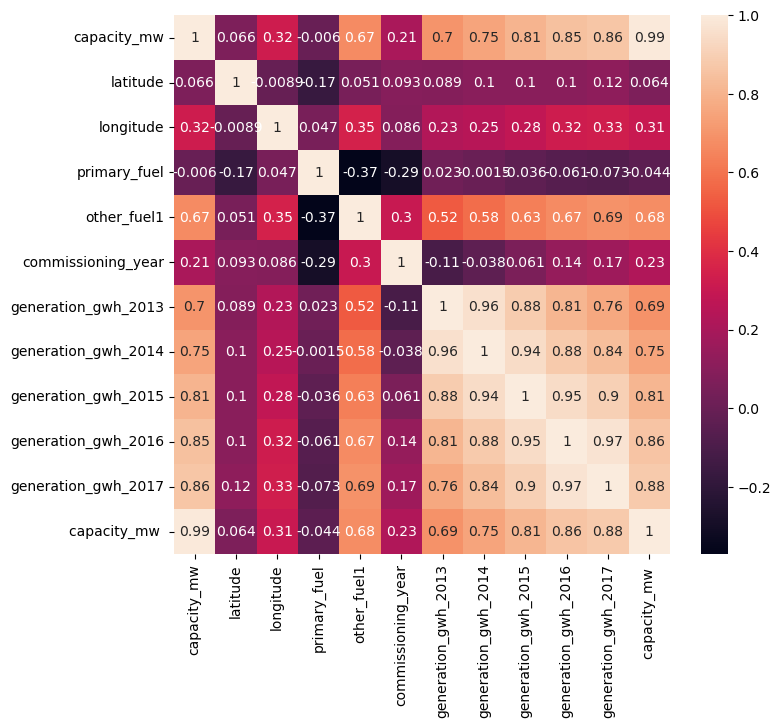

In [127]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True) 

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and train.

In [128]:
x = data.drop(['primary_fuel','capacity_mw'], axis =1)
y_fuel = data['primary_fuel']
y_capacity=data['capacity_mw']

In [129]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values             Features
0    1.043697             latitude
1    1.174190            longitude
2    2.213711          other_fuel1
3    1.357340   commissioning_year
4   15.261282  generation_gwh_2013
5   28.171794  generation_gwh_2014
6   20.099254  generation_gwh_2015
7   30.292068  generation_gwh_2016
8   20.489334  generation_gwh_2017
9    4.771518         capacity_mw

In [131]:
x_train, x_test, y_train_fuel, y_test_fuel = train_test_split(x, y_fuel,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_fuel.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_fuel.shape)

Training size: (567, 10)
Training target size: (567,)
Test size: (243, 10)
Test target size: (243,)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MODEL BULIDING (Classification model)

In [133]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}

In [134]:
for model_name, model in models.items():
    model.fit(x_train, y_train_fuel)
    y_pred_fuel = model.predict(x_test)
    print(f"{model_name} accuracy: {accuracy_score(y_test_fuel, y_pred_fuel)}")
    print(confusion_matrix(y_test_fuel, y_pred_fuel))
    print(classification_report(y_test_fuel, y_pred_fuel))

LogisticRegression accuracy: 0.6584362139917695
[[30  0  3  0  3  0  0  0]
 [11 54  1  0  3  0  0  0]
 [ 6  1 22  0  0  0  0  0]
 [ 2  3  1  4 11  0  0  0]
 [ 1  0  5  3 50  0  0  1]
 [ 4  0 11  0  3  0  0  0]
 [ 0  1  3  2  1  0  0  0]
 [ 0  0  0  0  3  0  0  0]]
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        36
           1       0.92      0.78      0.84        69
           2       0.48      0.76      0.59        29
           3       0.44      0.19      0.27        21
           4       0.68      0.83      0.75        60
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         3

    accuracy                           0.66       243
   macro avg       0.38      0.42      0.39       243
weighted avg       0.60      0.66      0.62       243

RandomForestClassifier accuracy: 0.7736625514403292
[[33  1  2  0  0  0  0  0]
 [ 5 

All the models above shows accuracy on test and train data also f1-score can be seen. From the above models the best suited model for this dataset is DecisionTreeClassifier model with 79% accuracy but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [135]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_fuel, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")

LogisticRegression CV mean accuracy: 62.84% ± 1.20%
RandomForestClassifier CV mean accuracy: 81.73% ± 1.49%
ExtraTreesClassifier CV mean accuracy: 81.11% ± 1.86%
SVC CV mean accuracy: 65.80% ± 2.67%
GradientBoostingClassifier CV mean accuracy: 80.37% ± 1.63%
AdaBoostClassifier CV mean accuracy: 35.43% ± 2.09%
BaggingClassifier CV mean accuracy: 80.00% ± 2.01%
DecisionTreeClassifier CV mean accuracy: 76.67% ± 3.61%


After Cross Valadition Score it is observed that the best suited model is RandomForestClassifier.

In [136]:
Rf=RandomForestClassifier()

In [137]:
Rf.fit(x_train,y_train_fuel)

RandomForestClassifier()

In [138]:
parameters={ 
 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
}

In [139]:
grid_GBC = GridSearchCV(Rf, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(x_train, y_train_fuel)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [140]:
filename="Fuel_Model.pkl"
pickle.dump(Rf,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(x_test,y_test_fuel)
print(result)

0.7777777777777778


Will be using Regression model on dependent variable "Capacity_mw"

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [142]:
x_train, x_test,y_train_capacity, y_test_capacity = train_test_split(x, y_capacity,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_capacity.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_capacity.shape)

Training size: (567, 10)
Training target size: (567,)
Test size: (243, 10)
Test target size: (243,)


In [143]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Lassocv":LassoCV(),
    "Ridgecv":RidgeCV()
}

In [144]:
for model_name,model in models.items():
    model.fit(x_train, y_train_capacity)
    model.score(x_test,y_test_capacity)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test_capacity,pred))
    print("Mean squared error",mean_squared_error(y_test_capacity,pred))
    print("r2 Score on test data",r2_score(y_test_capacity,pred)*100)  
    print("r2 Score on training data",r2_score(y_train_capacity,pred1)*100)

Linear Regression
Mean absolute Error 0.28462832670535476
Mean squared error 0.14019990467679982
r2 Score on test data 98.70743459785139
r2 Score on training data 98.63242962491161
KNN
Mean absolute Error 0.5222706948790452
Mean squared error 0.5773504695178698
r2 Score on test data 94.67714872179546
r2 Score on training data 95.45067741015546
Ada Boost Regressor
Mean absolute Error 0.17335125892660713
Mean squared error 0.04864192442204503
r2 Score on test data 99.55154842118614
r2 Score on training data 99.5083212764136
SV
Mean absolute Error 0.24694034826322503
Mean squared error 0.19244742978751908
r2 Score on test data 98.22574137943094
r2 Score on training data 98.97395609692782
Random Forest Regressor
Mean absolute Error 0.019607858578007006
Mean squared error 0.006084592260204052
r2 Score on test data 99.94390343231794
r2 Score on training data 99.9926724582253
Extra Trees Regressor
Mean absolute Error 0.020741531969069128
Mean squared error 0.0054851060632953915
r2 Score on te

All the models above shows R-squared Score on test and train data also Mean absolute error and Mean squared error can be seen. From the above models the best suited model for this dataset is Ada Boost Regressor and Random Forest Regressor model with 99% accuracy but still will be further to do cross validation on all the models to select the best suited model the given dataset.

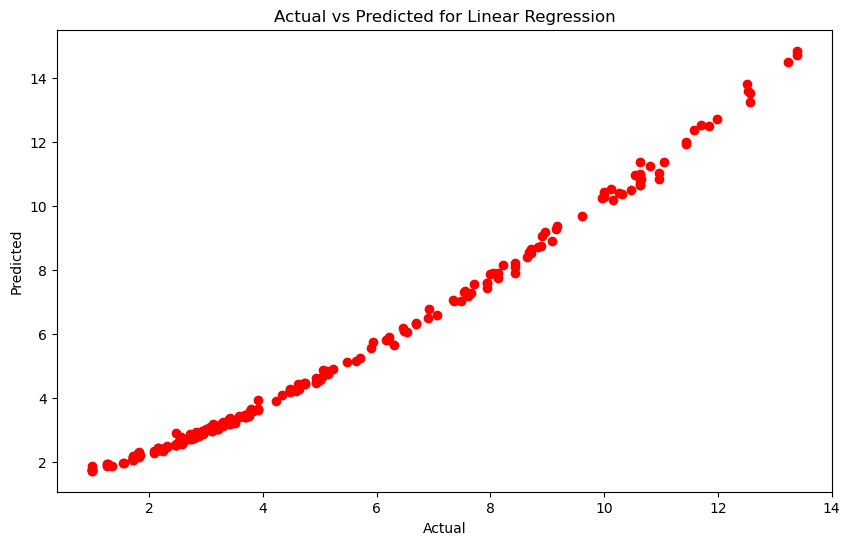

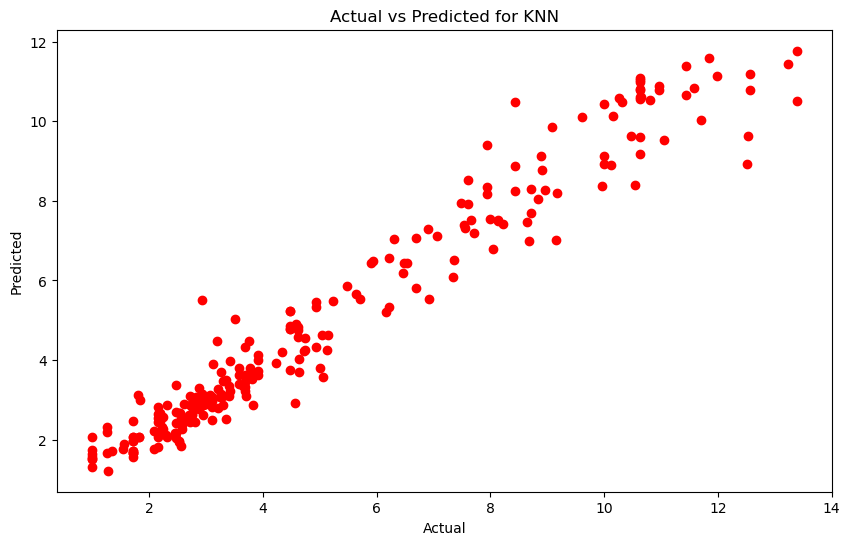

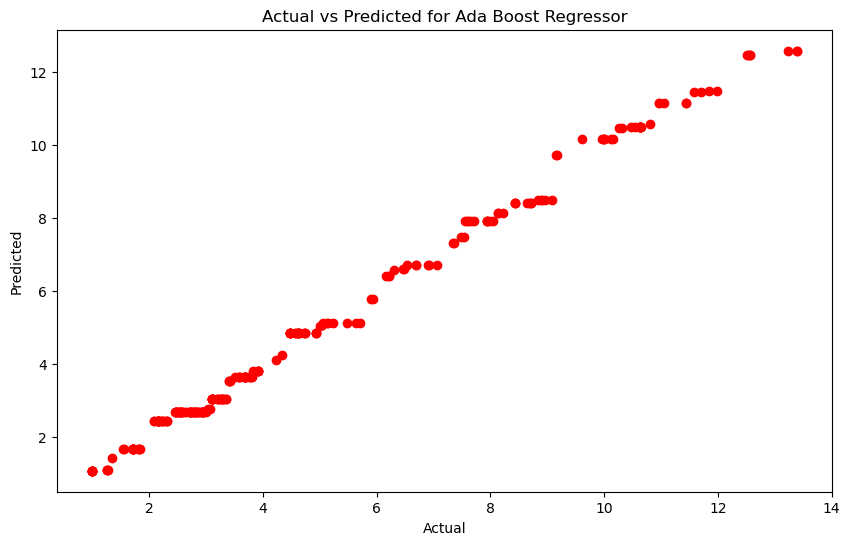

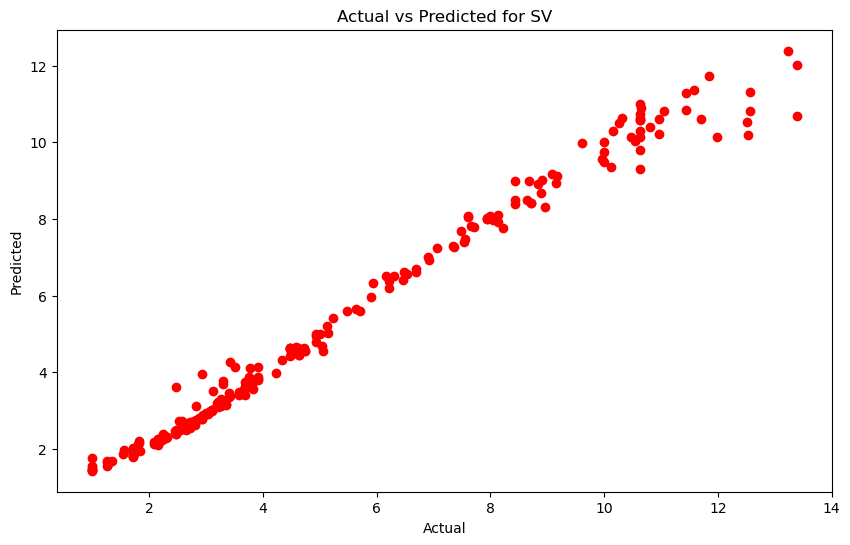

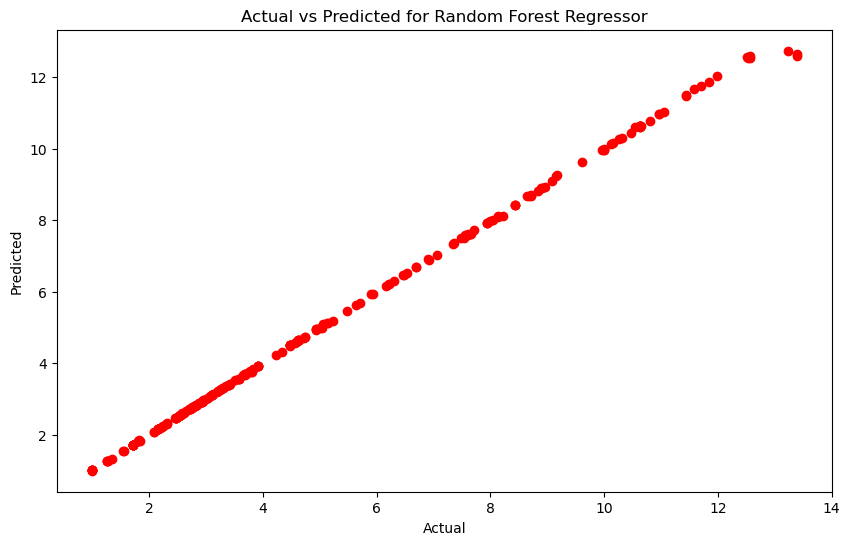

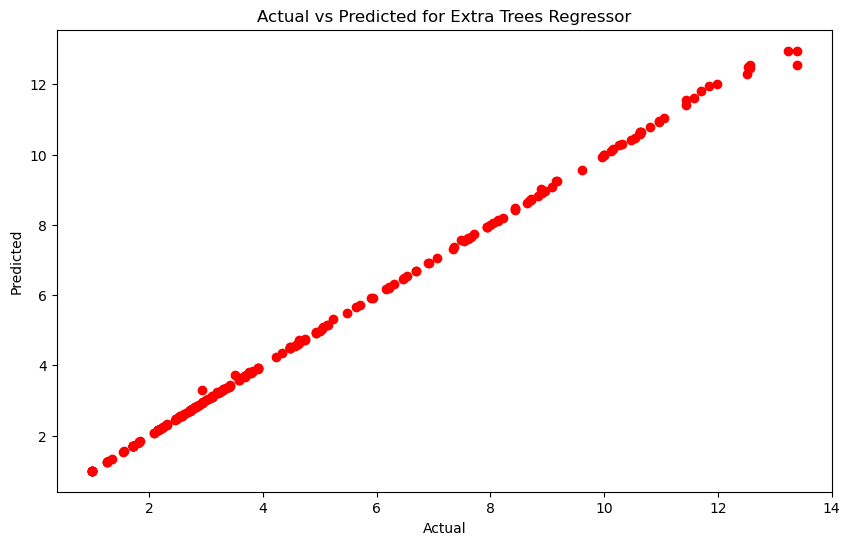

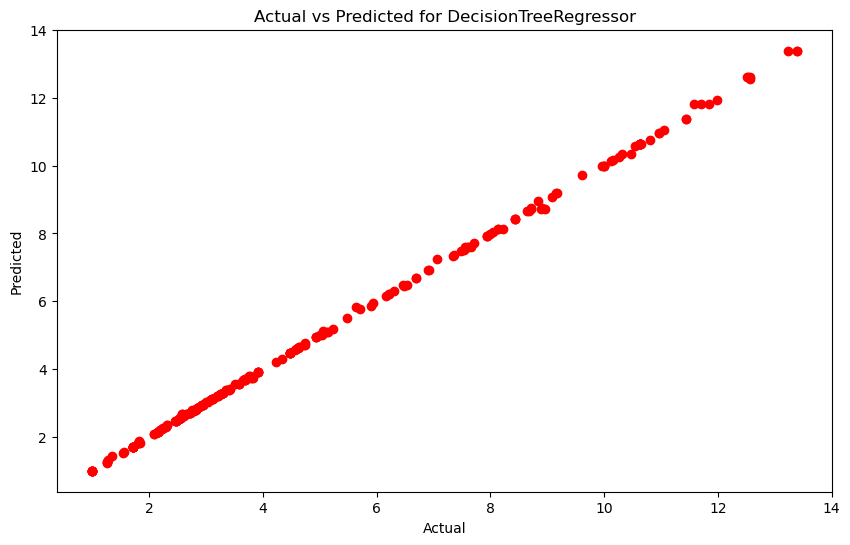

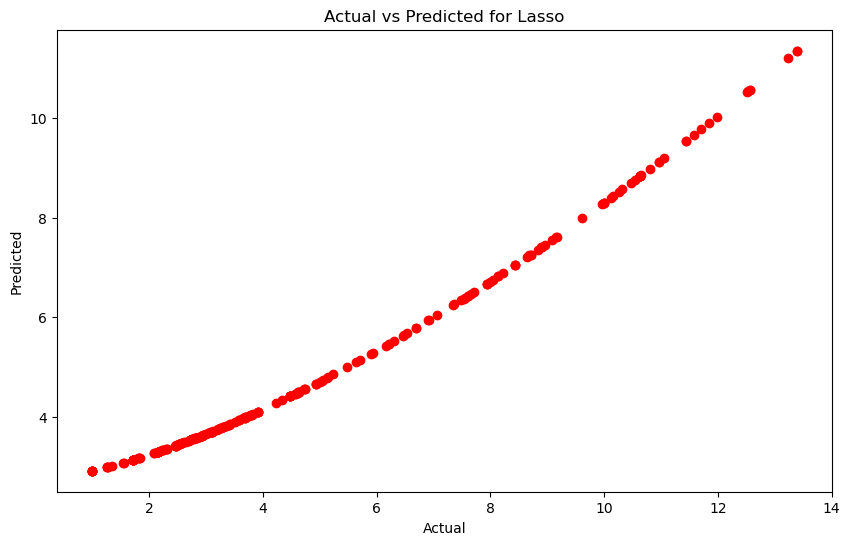

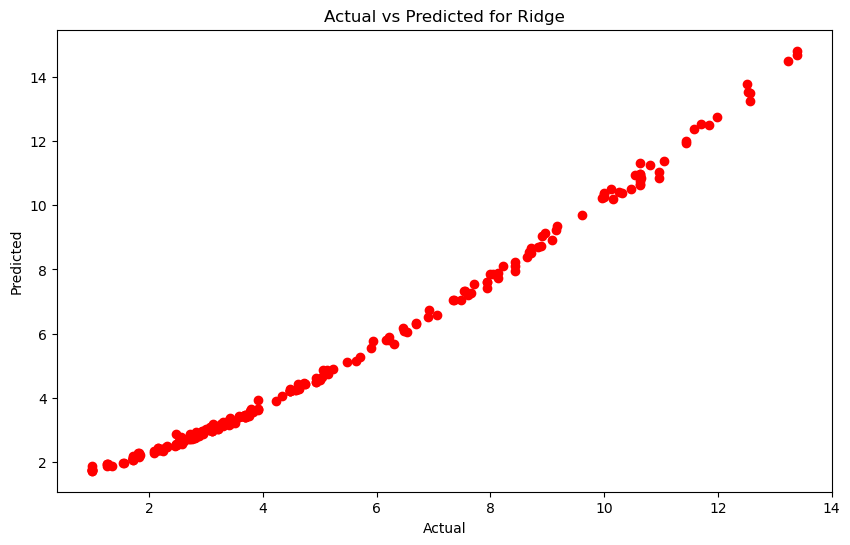

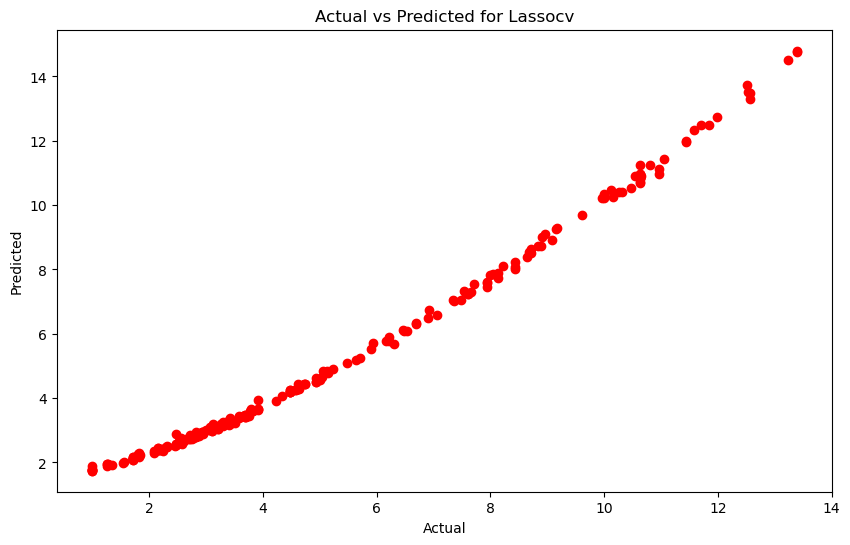

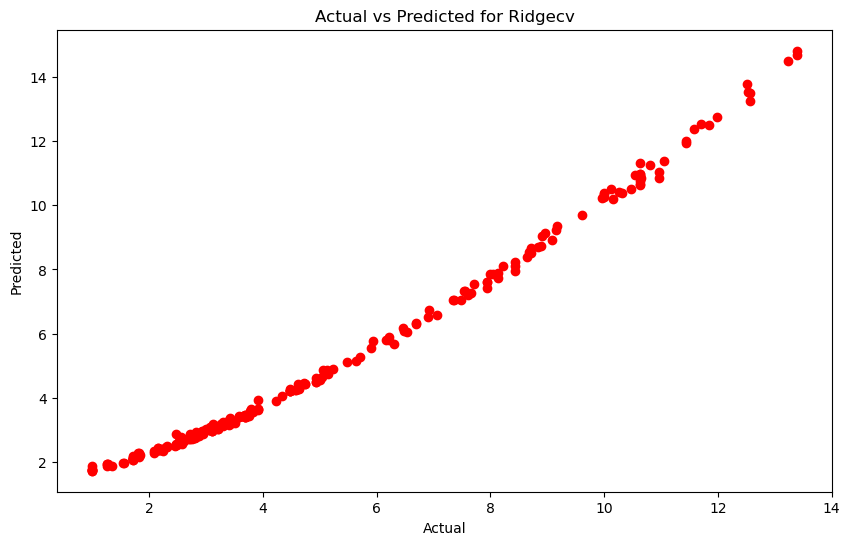

In [145]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_capacity, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [146]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_capacity, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Linear Regression CV mean accuracy: 0.99 ± 0.00
KNN CV mean accuracy: 0.93 ± 0.01
Ada Boost Regressor CV mean accuracy: 1.00 ± 0.00
SV CV mean accuracy: 0.99 ± 0.01
Random Forest Regressor CV mean accuracy: 1.00 ± 0.00
Extra Trees Regressor CV mean accuracy: 1.00 ± 0.00
DecisionTreeRegressor CV mean accuracy: 1.00 ± 0.00
Lasso CV mean accuracy: 0.88 ± 0.01
Ridge CV mean accuracy: 0.99 ± 0.00
Lassocv CV mean accuracy: 0.99 ± 0.00
Ridgecv CV mean accuracy: 0.99 ± 0.00


After Cross Valadition Score it is observed that the best suited model is Linear Regression. 

In [147]:
LR=LinearRegression()

In [148]:
LR.fit(x_train,y_train_capacity)

LinearRegression()

In [149]:
param= {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [150]:
gscv = GridSearchCV(LR, param, cv=5)
gscv.fit(x_train, y_train_capacity)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [151]:
filename="NextTmax_Model_1.pkl"
with open(filename, 'wb') as file:
    pickle.dump(LR, file)
with open(filename, 'rb') as file:
    Final_Model = pickle.load(file)
result = Final_Model.score(x_test, y_test_capacity)
print(result)

0.9870743459785138
